# Vignettes

Model predictions at some interesting locus-- LIN28A on chr1 is a good test candidate.

**Inputs**:
1. Outputs from Py_Vignette script-- normalized insertsions and prediction tsvs at some locus.
2. Cluster config

In [1]:
library(ggplot2)
library(patchwork)
library(Gviz)
library(rtracklayer)
library(ggplotify)
library(ggseqlogo)
library(scales)
library(BSgenome.Hsapiens.UCSC.hg38)
library(reshape2)
hg38 = BSgenome.Hsapiens.UCSC.hg38

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

## Load Input Data

### Configs

In [2]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)


cluster_config = cluster_config[!is.na(cluster_config$cluster), ]
rownames(cluster_config) = as.factor(cluster_config$cluster)
cluster_config$new_cluster = as.integer(cluster_config$new_cluster)
cluster_config$cluster = as.integer(cluster_config$cluster)
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#B03743,Fibroblast,1
2,2,#E85F6D,Fibroblast-like,3
3,3,#7C2730,Fibroblast-like,2
4,4,#F0A118,Intermediate,12
5,5,#78A824,Pre-iPSC,13
6,6,#A6D854,Pre-iPSC,14
7,7,#F01D35,Fibroblast-like,5
8,8,#13C4A3,iPSC,15
9,9,#406614,Partially-reprogrammed,10


## Preds/Insertions

In [3]:
model_preds = read.table("./Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.pred.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(model_preds) = model_preds$cluster_idx
model_preds$cluster_idx = NULL
model_preds

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0001154015,0.0001773818,1.983292e-06,1.232137e-05,2.915024e-05,1.833986e-05,9.944849e-05,1.801757e-06,5.75036e-05,4.984517e-06,⋯,0.0002835165,0.0007385598,0.001167605,4.223366e-05,0.0009420306,0.001041914,0.01462758,5.648621e-05,0.0002498681,0.001157560
11,0.0000000000,0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,⋯,0.0005743456,0.0013569326,0.002370090,8.809303e-05,0.0020330538,0.002425892,0.02502093,1.245635e-04,0.0005838622,0.002285122
8,0.0000000000,0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,⋯,0.0003033253,0.0008032604,0.001176671,4.344937e-05,0.0010246626,0.001093051,0.01535588,7.324865e-05,0.0002548314,0.001164636


In [5]:
model_preds_wo_bias = read.table("./Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.pred.wo_bias.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(model_preds_wo_bias) = model_preds_wo_bias$cluster_idx
model_preds_wo_bias$cluster_idx = NULL
model_preds_wo_bias

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.002261066,0.002502858,0.001884581,0.002065785,0.002013836,0.00144341,0.001721771,0.001226723,0.001398533,0.001535188,⋯,0.002300868,0.002378007,0.001810105,0.001619802,0.001933218,0.001623408,0.002186969,0.001400614,0.001628098,0.001828410
11,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.005301307,0.004862331,0.004019268,0.003748857,0.004579785,0.004182319,0.004304017,0.003549102,0.004571389,0.004336227
8,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.002327948,0.002366128,0.001671654,0.001529244,0.001931211,0.001635099,0.002338446,0.001780128,0.001711289,0.001864444


In [6]:
insertions = read.table("./Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.insertions.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(insertions) = insertions$cluster_idx
insertions$cluster_idx = NULL
insertions

,total_adjusted_cts,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.733402,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0.01000000,0,0,0
11,6.890816,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0.00000000,0,0,0
8,7.430109,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0.01190476,0,0,0


In [150]:
bias_pred = unlist(read.table("./Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.bias.pred.softmax.tsv", 
                         sep='\t'))
bias_pred[1:10]
length(bias_pred)

Warning message in read.table("./Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.bias.pred.softmax.tsv", :
"incomplete final line found by readTableHeader on './Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.bias.pred.softmax.tsv'"


V1           V2           V3           V4           V5           V6 
1.033688e-04 4.616516e-05 1.190820e-05 2.494113e-05 6.840503e-06 2.119804e-05 
          V7           V8           V9          V10 
3.211987e-05 1.483500e-06 4.011698e-05 2.040069e-06

[1] 2000

In [40]:
importance = read.table("./Supp/Ins2_vignette_intermediate/Ins2.chr12.7807055.counts.explain.tsv", 
                         sep='\t',
                        header=T)
rownames(importance) = importance$cluster_idx
importance$cluster_idx = NULL
importance

,lower_lim,upper_lim,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.033098,0.213128,0.001160905,-3.525607e-05,-5.987174e-05,0.001284132,0.00200804,0.0008713215,0.001649478,-0.0008486952,⋯,0.0015435080,1.772675e-03,0.0015064563,0.0016140414,0.0007053107,0.0011491831,0.0011551216,0.0023584405,0.0006668706,0.0008063063
11,-0.028583,0.127204,0.000000000,0.000000e+00,0.000000e+00,0.000000000,0.00000000,0.0000000000,0.000000000,0.0000000000,⋯,-0.0004415052,-6.069666e-05,-0.0010339181,0.0001240830,-0.0006469359,0.0001560734,0.0003280632,0.0003908502,0.0008276628,-0.0003971483
8,-0.026970,0.175611,0.000000000,0.000000e+00,0.000000e+00,0.000000000,0.00000000,0.0000000000,0.000000000,0.0000000000,⋯,0.0005499777,-1.320261e-03,-0.0001681032,0.0005311724,-0.0022907413,0.0009611330,-0.0003219502,0.0001652078,-0.0007170704,0.0004523230


In [8]:
CLUSTERS = rownames(insertions)
CLUSTERS
all(CLUSTERS %in% rownames(model_preds))

[1] "1"  "11" "8"

[1] TRUE

### Gene Model

In [9]:
gencode.basic.hg38 = import.gff(gzfile("../../../resources/GENCODE/gencode.v33.chr_patch_hapl_scaff.basic.annotation.gtf.gz"))
gencode.basic.hg38 = keepStandardChromosomes(gencode.basic.hg38, pruning.mode = "coarse")
gene_anno <- data.frame(gencode.basic.hg38)
gene_anno = gene_anno[!is.na(gene_anno$exon_number), ]
gene_anno = gene_anno[gene_anno$gene_type=="protein_coding", ]

# rename some columns to match requirements
gene_anno$chromosome <-  gene_anno$seqnames
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_name
gene_anno$symbol <- gene_anno$gene_name

gene_anno$feature = as.character(gene_anno$type)
gene_anno$exon = gene_anno$exon_id
gene_anno = gene_anno[,c("chromosome", "start", "end", "strand", "gene", "symbol", "transcript", "feature", "exon")]
head(gene_anno)

Warning message in readGFF(filepath, version = version, filter = filter):
"connection is not positioned at the start of the file, rewinding it"


,chromosome,start,end,strand,gene,symbol,transcript,feature,exon
,<fct>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
57,chr1,65419,65433,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003812156.1
58,chr1,65520,65573,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003813641.1
59,chr1,65565,65573,+,ENSG00000186092.6,OR4F5,OR4F5-202,CDS,ENSE00003813641.1
60,chr1,65565,65567,+,ENSG00000186092.6,OR4F5,OR4F5-202,start_codon,ENSE00003813641.1
61,chr1,69037,71585,+,ENSG00000186092.6,OR4F5,OR4F5-202,exon,ENSE00003813949.1
62,chr1,69037,70005,+,ENSG00000186092.6,OR4F5,OR4F5-202,CDS,ENSE00003813949.1


## Functions

In [10]:
get_gene_track <- function(chr, gene_anno, show_axis=T, col='navyblue') {
    gene_track <- GeneRegionTrack(gene_anno, genome = "hg38", 
                                 chromosome = chr, 
                                 name = "", 
                                 collapseTranscripts="longest",
                                 transcriptAnnotation="symbol",
                                background.title = 'transparent',
                                  
                                fill=col,
                                stackHeight=0.5,
                                 
                                col=col,
                                col.line=col,
                                fontcolor.group=col,
                                lwd=2,
                                  fontsize.group=20
                                 )
    if (!show_axis) {
            displayPars(gene_track)$showTitle = F
        }
    
    gene_track
}

In [63]:
plot_mat <- function(obs_mat, pred_mat, pred_wo_bias_mat, importance, importance_mat, label_off=100, title=F) {
    plots = list()
    stopifnot(ncol(obs_mat)==ncol(pred_mat))
    
    i=1
    for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {
        plots[[i]] = ggplot(data.frame(x=seq(ncol(obs_mat)),
                                       y=unlist(obs_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    coord_cartesian(ylim=c(0,1)) + 
                    theme_void(base_size=18) +
                    annotate('text', x=ncol(obs_mat)-label_off, y=0.7, label="Obs", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i]] = plots[[i]] + 
                            ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - ")) 
        
        plots[[i+1]] = ggplot(data.frame(x=seq(ncol(pred_mat)),
                                       y=unlist(pred_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    coord_cartesian(ylim=c(0,1)) + 
                    theme_void() +
                    annotate('text', x=ncol(obs_mat)-label_off, y=0.7, label="Pred", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i+1]] = plots[[i+1]] + 
                            ggtitle(" ") 
        
        plots[[i+2]] = ggplot(data.frame(x=seq(ncol(pred_wo_bias_mat)),
                                       y=unlist(pred_wo_bias_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    geom_area(aes(x=x,y=y), fill=cluster_config[x,"colour"]) +
                    coord_cartesian(ylim=c(0,1)) + 
                    theme_void() +
                    annotate('text', x=ncol(obs_mat)-label_off, y=0.7, label="Pred (without bias)", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i+2]] = plots[[i+2]] + 
                            ggtitle(" ") 
        
        plots[[i+3]] = plot_seq(importance_mat[[x]], 
                   ymin=importance[x, "lower_lim"],
                   ymax=importance[x, "upper_lim"] ,
                   clip=T) 
        
#         plots[[i+3]] = plots[[i+3]] + 
#                annotate('text', x=ncol(obs_mat)-label_off, y=0.7, label="Pred (without bias)", size=6) +
#             ggtitle(" ")

#         else {
#             # need this to keep alignment
#             plots[[i]] = plots[[i]] + ggtitle(" ")
#         }
        
        i = i + 4
    }
    
    plots
}


In [90]:
# many bigwigs, one peak
importance_to_matrix <- function(clusters, imp_scores, peak) {
    # get DNA sequence
    sequence = hg38[[as.vector(seqnames(peak))]][(start(peak)+1):(end(peak))]
    
    scores = list()
    
    for (i in clusters) {
        m = matrix(0, length(sequence), 4)
        colnames(m) = c("A", "C", "G", "T")
        m[cbind(seq(length(sequence)), as.vector(matrix(sequence)))] = unlist(imp_scores[i, 3:ncol(imp_scores)])
        
        scores[[i]] = t(m)
    }
    
    scores
}

In [91]:
plot_seq <- function(m, ymin, ymax, clip=F, cutrange=NULL) {
    mat = m
    
#     rownames(mat) = c("A", "C", "G", "T")
    
    # cap to upper and lower limits
    if (clip==T) {
        mat[mat>ymax] = ymax
        mat[mat<ymin] = ymin
    }
    
    
    if (length(cutrange) == 0) {
        p = ggseqlogo(mat, method='custom', seq_type='dna') 
    }
    
    else {
        p = ggseqlogo(mat[,cutrange], method='custom', seq_type='dna') 
    }
    
    p = p + theme_void() + coord_cartesian(ylim=c(ymin, ymax))
    
    p
}

## Plotting

In [123]:
CHR= "chr12"
START = 7807055-1000
END = 7807055+1000
LEFT_TRIM=875
RIGHT_TRIM = 875

REGION = GRanges(sprintf("%s:%d-%d", CHR, START, END))


In [124]:
imp_matrices = importance_to_matrix(CLUSTERS, importance, REGION)

In [125]:
# trim imp matrices
trimmed_imp_matrices = list()

for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {
    trimmed_imp_matrices[[x]] = imp_matrices[[x]][, LEFT_TRIM:(ncol(imp_matrices[[x]])-RIGHT_TRIM)]
}

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



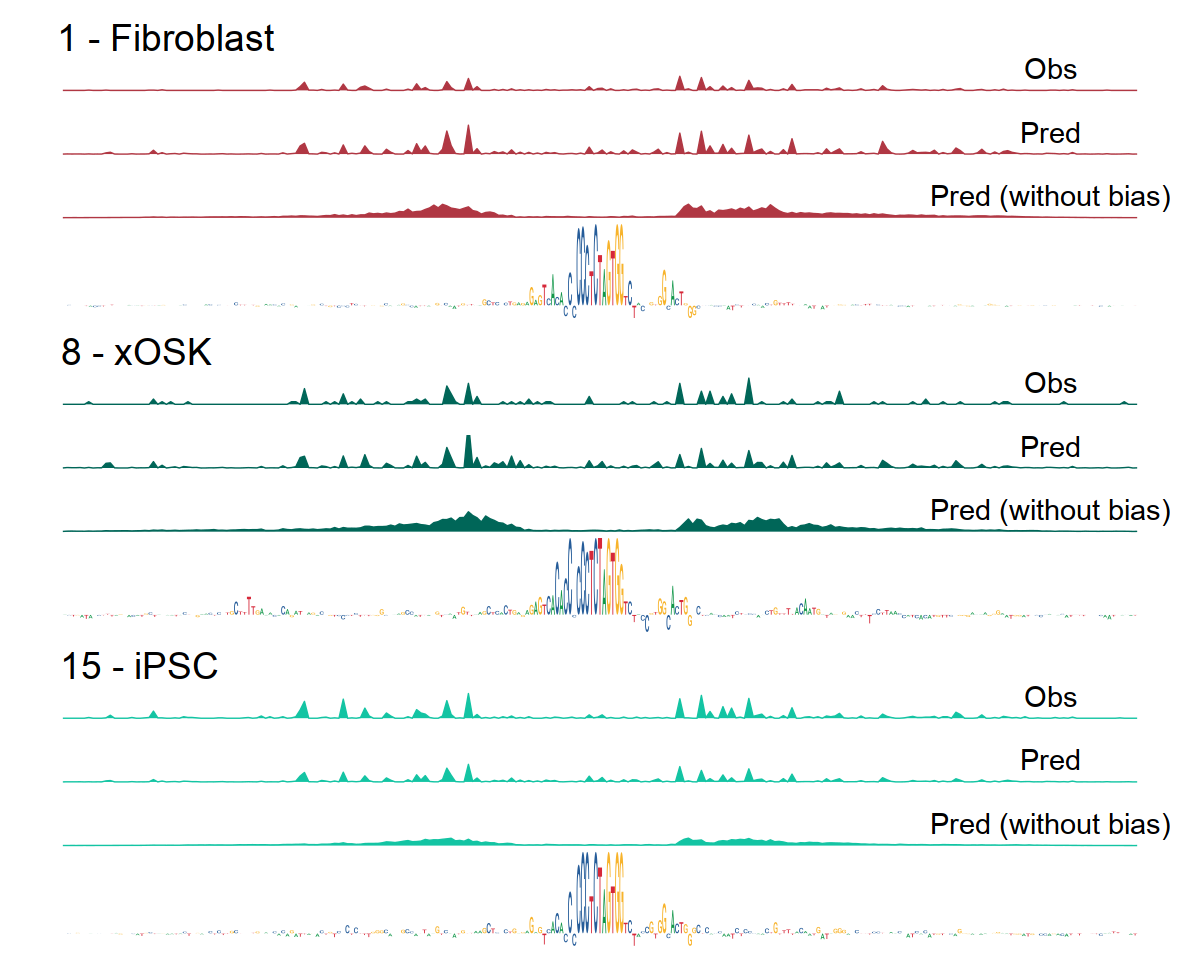

In [175]:
options(repr.plot.width = 10, repr.plot.height = 8)
 

signal_plot = wrap_plots(plot_mat(insertions[,(2+LEFT_TRIM):(2001-RIGHT_TRIM)], 
                                  model_preds[,(1+LEFT_TRIM):(2000-RIGHT_TRIM)],
                                  model_preds_wo_bias[,(1+LEFT_TRIM):(2000-RIGHT_TRIM)],
                                  importance,
                                  trimmed_imp_matrices,
                                 label_off=20), ncol=1, heights=rep(c(1,1,1,3), length(CLUSTERS)))

signal_plot

In [176]:
top_plot = ggplot() + annotate("text", x=5, y=1, label=sprintf("Ins2 (%s:%d-%d)", CHR, START+LEFT_TRIM, END-RIGHT_TRIM), size=8) +
#             annotate("text", x=7.5, y=1, label="Predicted", size=TXTSZ) +
            xlim(c(0,10)) + 
            theme_void()

In [204]:
bias_trimmed = bias_pred[(LEFT_TRIM+1):(length(bias_pred)-RIGHT_TRIM)]

bias_plot = ggplot(data.frame(x=seq(length(bias_trimmed)),
                                       y=bias_trimmed)) +
                    geom_line(aes(x=x,y=y), size=.3, col='black') +
                    geom_area(aes(x=x,y=y), fill='black') +
                    coord_cartesian(ylim=c(0,.01)) + 
                    theme_void() +
#                     annotate('text', x=200, y=0.02, label="Pred Tn5 Bias", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))

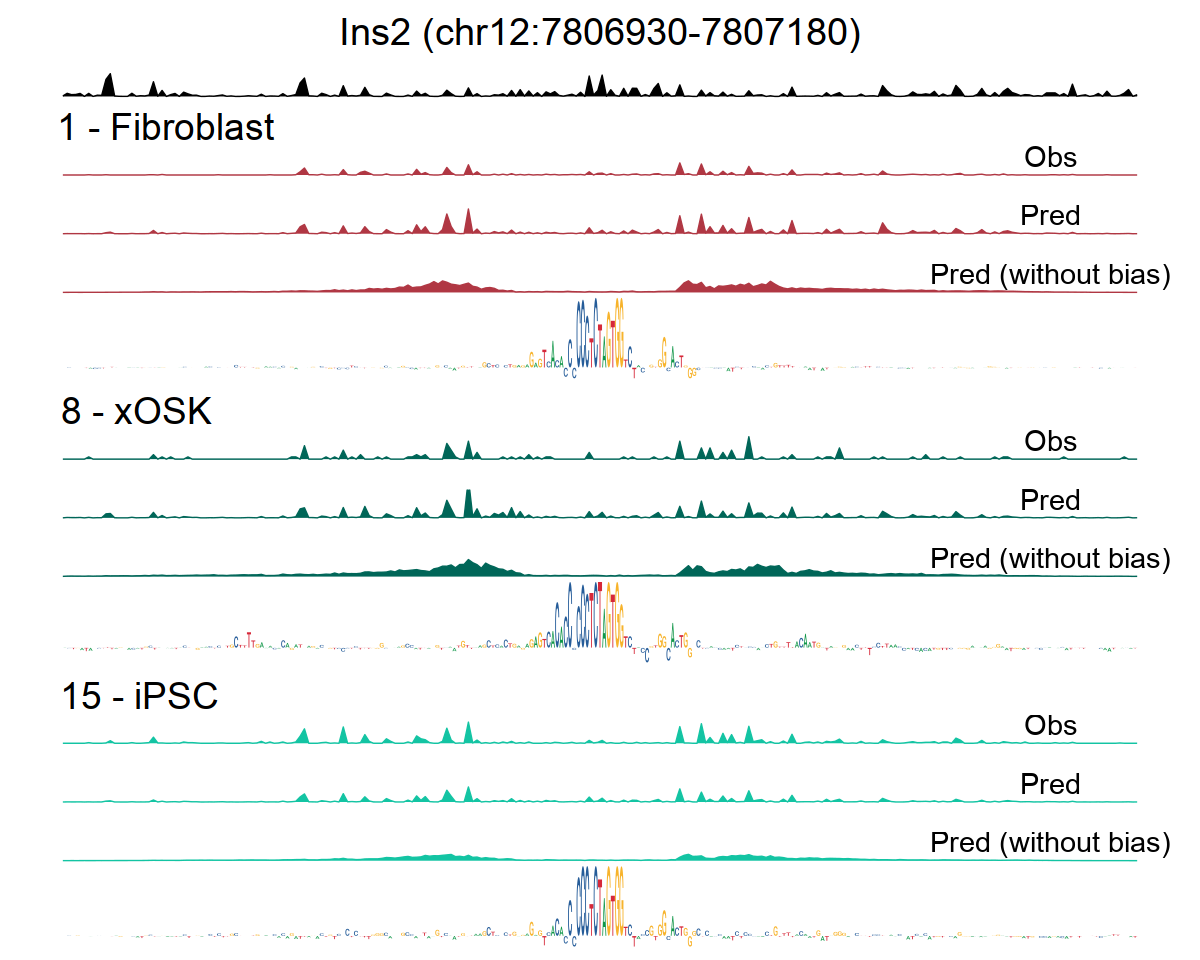

In [207]:
plot = wrap_plots(top_plot, bias_plot, signal_plot, heights=c(1,1,18))
plot

In [208]:
ggsave(sprintf("./subfigs/Supp.Ins2.prom.pred.%s.%d.%d.pdf", CHR,START+LEFT_TRIM,END-RIGHT_TRIM), 
       plot, height=12, width=14,
      useDingbats=F)

---

In [131]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.4                    BSgenome.Hsapiens.UCSC.hg38_1.4.1
 [3] BSgenome_1.54.0                   Biostrings_2.54.0                
 [5] XVector_0.26.0                    scales_1.1.0                     
 [7] ggseqlogo_0.1                     ggplo